In [ ]:
! pip install keras-nlp

In [2]:
import sys
sys.path.append('VCDB')

In [3]:
from model import define_pair_video_encoder, triplet_loss
from DataLoader import DataLoader 
import tensorflow as tf
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Using TensorFlow backend


In [4]:
videos_folder = "/kaggle/input/vcdb-dataset/dataset"
data_loader = DataLoader(videos_folder)

In [5]:
batch_size = 4
emb_size = 2048
training_steps = 250
pre_process_network = "RESNET_50"
max_frames = 30

In [6]:
video_pairs_generator = data_loader.create_data_generator(batch_size=batch_size, pre_process_network=pre_process_network, max_frames=max_frames)

In [7]:
cross_attn_video_pair_encoder_inception_v3 = define_pair_video_encoder(pre_process_network, emb_size=emb_size, cnn_trainable=True, use_custom_cross_attn=True, alpha=0.0)

102967424/102967424 [==============================] - 3s 0us/step


In [8]:
cross_attn_video_pair_encoder_inception_v3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, 224,   0           []                               
                                224, 3)]                                                          
                                                                                                  
 input_3 (InputLayer)           [(None, None, 224,   0           []                               
                                224, 3)]                                                          
                                                                                                  
 cnn_video_encoder (CNNVideoEnc  (None, None, 2048)  23587712    ['input_2[0][0]',                
 oder)                                                            'input_3[0][0]']          

In [9]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [10]:
def train_step(video_frames_1, video_frames_2):
    with tf.GradientTape() as tape:
        video_embeddings_1, _, video_embeddings_2, _ = cross_attn_video_pair_encoder_inception_v3([video_frames_1, video_frames_2])
        loss = triplet_loss(video_embeddings_1, video_embeddings_2, margin=0.5)
        
    trainable_variables = cross_attn_video_pair_encoder_inception_v3.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)    
    adam.apply_gradients(zip(gradients, trainable_variables))
    return loss

In [11]:
def load_video_frame_pair_batch():
    video_frames_1, video_frames_2 = next(video_pairs_generator)
    return video_frames_1, video_frames_2

In [12]:
%%time
for step in range(training_steps):
    print(f"Training step {step+1} of {training_steps}")
    video_frames_1, video_frames_2 = load_video_frame_pair_batch()
    
    loss = train_step(video_frames_1, video_frames_2)
    print(f"Loss at step {step+1} is {loss}")

Training step 1 of 250
Loss at step 1 is 0.7531587481498718
Training step 2 of 250
Loss at step 2 is 0.696845531463623
Training step 3 of 250
Loss at step 3 is 0.7479141354560852
Training step 4 of 250
Loss at step 4 is 0.7728849053382874
Training step 5 of 250
Loss at step 5 is 0.7395398020744324
Training step 6 of 250
Loss at step 6 is 0.7079769968986511
Training step 7 of 250
Loss at step 7 is 0.6770309209823608
Training step 8 of 250
Loss at step 8 is 0.7261605262756348
Training step 9 of 250
Loss at step 9 is 0.6192999482154846
Training step 10 of 250
Loss at step 10 is 0.72259920835495
Training step 11 of 250
Loss at step 11 is 0.727626621723175
Training step 12 of 250
Loss at step 12 is 0.6643621921539307
Training step 13 of 250
Loss at step 13 is 0.6678457260131836
Training step 14 of 250
Loss at step 14 is 0.5652021169662476
Training step 15 of 250
Loss at step 15 is 0.812196671962738
Training step 16 of 250
Loss at step 16 is 0.600192666053772
Training step 17 of 250
Loss at 

[NULL @ 0x59ffeab7ab40] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59ffeab7ab40] missing picture in access unit with size 3077
[NULL @ 0x59ffeab7ab40] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59ffeab7ab40] missing picture in access unit with size 3077
[h264 @ 0x59ff9a98d300] Invalid NAL unit size (3295 > 3073).
[h264 @ 0x59ff9a98d300] Error splitting the input into NAL units.
[NULL @ 0x59ffeab7ab40] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59ffeab7ab40] missing picture in access unit with size 3077
[NULL @ 0x59ffeab7ab40] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59ffeab7ab40] missing picture in access unit with size 3077
[h264 @ 0x59ff9a98d300] Invalid NAL unit size (3295 > 3073).
[h264 @ 0x59ff9a98d300] Error splitting the input into NAL units.
[NULL @ 0x59ffeab7ab40] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59ffeab7ab40] missing picture in access unit with size 3077
[NULL @ 0x59ffeab7ab40] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59ffeab7ab40] missin

Unable to read frame #1152 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/beckham_70_yard_goal/ab12206048207553294916664d0ebf1cd9e81ef6.flv'. Skipping and Continuing.!!
Unable to read frame #1230 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/beckham_70_yard_goal/ab12206048207553294916664d0ebf1cd9e81ef6.flv'. Skipping and Continuing.!!
Unable to read frame #1250 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/beckham_70_yard_goal/ab12206048207553294916664d0ebf1cd9e81ef6.flv'. Skipping and Continuing.!!
Loss at step 36 is 0.42985284328460693
Training step 37 of 250
Loss at step 37 is 0.29331129789352417
Training step 38 of 250
Loss at step 38 is 0.22947928309440613
Training step 39 of 250
Loss at step 39 is 0.5363913774490356
Training step 40 of 250
Loss at step 40 is 0.653212308883667
Training step 41 of 250
Loss at step 41 is 0.5468706488609314
Training step 42 of 250
Loss at step 42 is 0.44612646102905273
Training step 43 of 250
Loss at step 43 is 0.22

[NULL @ 0x59fde1122ec0] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59fde1122ec0] missing picture in access unit with size 3077
[NULL @ 0x59fde1122ec0] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59fde1122ec0] missing picture in access unit with size 3077
[h264 @ 0x5a00df723a00] Invalid NAL unit size (3295 > 3073).
[h264 @ 0x5a00df723a00] Error splitting the input into NAL units.
[NULL @ 0x59fde1122ec0] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59fde1122ec0] missing picture in access unit with size 3077
[NULL @ 0x59fde1122ec0] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59fde1122ec0] missing picture in access unit with size 3077
[h264 @ 0x5a00df723a00] Invalid NAL unit size (3295 > 3073).
[h264 @ 0x5a00df723a00] Error splitting the input into NAL units.
[NULL @ 0x59fde1122ec0] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59fde1122ec0] missing picture in access unit with size 3077
[NULL @ 0x59fde1122ec0] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x59fde1122ec0] missin

Unable to read frame #1153 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/beckham_70_yard_goal/ab12206048207553294916664d0ebf1cd9e81ef6.flv'. Skipping and Continuing.!!
Unable to read frame #1231 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/beckham_70_yard_goal/ab12206048207553294916664d0ebf1cd9e81ef6.flv'. Skipping and Continuing.!!
Unable to read frame #1278 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/beckham_70_yard_goal/ab12206048207553294916664d0ebf1cd9e81ef6.flv'. Skipping and Continuing.!!
Loss at step 56 is 0.27511680126190186
Training step 57 of 250
Loss at step 57 is 0.21901506185531616
Training step 58 of 250
Loss at step 58 is 0.13451454043388367
Training step 59 of 250
Loss at step 59 is 0.12519069015979767
Training step 60 of 250
Loss at step 60 is 0.2435457855463028
Training step 61 of 250
Loss at step 61 is 0.39409518241882324
Training step 62 of 250
Loss at step 62 is 0.3484187722206116
Training step 63 of 250
Loss at step 63 is 0.

[flv @ 0x5a026b525980] Packet mismatch 1024 1050 9340438


Loss at step 74 is 0.08011043071746826
Training step 75 of 250
Loss at step 75 is 0.34083783626556396
Training step 76 of 250
Loss at step 76 is 0.20785528421401978
Training step 77 of 250
Loss at step 77 is 0.3255693018436432
Training step 78 of 250
Loss at step 78 is 0.13139817118644714
Training step 79 of 250
Loss at step 79 is 0.3707335591316223
Training step 80 of 250
Loss at step 80 is 0.0053499117493629456
Training step 81 of 250


[flv @ 0x5a026b525980] Packet mismatch 1024 1050 2877833


Loss at step 81 is 0.1780301034450531
Training step 82 of 250
Loss at step 82 is 0.3369871973991394
Training step 83 of 250
Loss at step 83 is 0.07366655766963959
Training step 84 of 250
Loss at step 84 is 0.028296127915382385
Training step 85 of 250
Loss at step 85 is 0.22650794684886932
Training step 86 of 250
Loss at step 86 is 0.21459975838661194
Training step 87 of 250
Loss at step 87 is 0.2309577465057373
Training step 88 of 250
Loss at step 88 is 0.04329509288072586
Training step 89 of 250
Loss at step 89 is 0.011936761438846588
Training step 90 of 250
Loss at step 90 is 0.14907154440879822
Training step 91 of 250
Loss at step 91 is 0.23646463453769684
Training step 92 of 250
Loss at step 92 is 0.10998541861772537
Training step 93 of 250
Loss at step 93 is 0.06592824310064316
Training step 94 of 250


[NULL @ 0x5a00b16fcc80] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x5a00b16fcc80] missing picture in access unit with size 3077
[NULL @ 0x5a00b16fcc80] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x5a00b16fcc80] missing picture in access unit with size 3077
[h264 @ 0x59fde1637c00] Invalid NAL unit size (3295 > 3073).
[h264 @ 0x59fde1637c00] Error splitting the input into NAL units.
[NULL @ 0x5a00b16fcc80] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x5a00b16fcc80] missing picture in access unit with size 3077
[NULL @ 0x5a00b16fcc80] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x5a00b16fcc80] missing picture in access unit with size 3077
[h264 @ 0x59fde1637c00] Invalid NAL unit size (3295 > 3073).
[h264 @ 0x59fde1637c00] Error splitting the input into NAL units.
[NULL @ 0x5a00b16fcc80] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x5a00b16fcc80] missing picture in access unit with size 3077
[NULL @ 0x5a00b16fcc80] Invalid NAL unit size (3295 > 3073).
[NULL @ 0x5a00b16fcc80] missin

Unable to read frame #1188 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/beckham_70_yard_goal/ab12206048207553294916664d0ebf1cd9e81ef6.flv'. Skipping and Continuing.!!
Unable to read frame #1230 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/beckham_70_yard_goal/ab12206048207553294916664d0ebf1cd9e81ef6.flv'. Skipping and Continuing.!!
Unable to read frame #1256 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/beckham_70_yard_goal/ab12206048207553294916664d0ebf1cd9e81ef6.flv'. Skipping and Continuing.!!
Loss at step 94 is 0.11394067853689194
Training step 95 of 250
Loss at step 95 is 0.26715728640556335
Training step 96 of 250
Loss at step 96 is 0.05231937766075134
Training step 97 of 250
Loss at step 97 is 0.09158749878406525
Training step 98 of 250
Loss at step 98 is 0.022213898599147797
Training step 99 of 250
Loss at step 99 is 0.1355363130569458
Training step 100 of 250
Loss at step 100 is 0.1819586306810379
Training step 101 of 250
Loss at step 101 

[flv @ 0x59fde1455100] Packet mismatch 1024 1050 9375806


Loss at step 146 is 0.31378990411758423
Training step 147 of 250
Loss at step 147 is 0.008524022996425629
Training step 148 of 250
Loss at step 148 is 0.021871015429496765
Training step 149 of 250
Loss at step 149 is 0.13078591227531433
Training step 150 of 250
Loss at step 150 is 0.09914170950651169
Training step 151 of 250
Loss at step 151 is 0.12259503453969955
Training step 152 of 250
Loss at step 152 is 0.17468947172164917
Training step 153 of 250
Loss at step 153 is 0.23020072281360626
Training step 154 of 250
Loss at step 154 is 0.0
Training step 155 of 250
Loss at step 155 is 0.14285576343536377
Training step 156 of 250
Loss at step 156 is 0.11741071194410324
Training step 157 of 250
Loss at step 157 is 0.15779587626457214
Training step 158 of 250
Loss at step 158 is 0.04321588575839996
Training step 159 of 250
Loss at step 159 is 0.109042227268219
Training step 160 of 250
Loss at step 160 is 0.11291667819023132
Training step 161 of 250
Loss at step 161 is 0.0
Training step 162

[flv @ 0x5a03c22e4a80] Missing AMF_END_OF_OBJECT in AMF_DATA_TYPE_MIXEDARRAY, found 0


Loss at step 169 is 0.0
Training step 170 of 250
Unable to read frame #1266 of video '/kaggle/input/vcdb-dataset/dataset/core_dataset/president_obama_takes_oath/750357acf34899c1c99eb2ae22880c88a776c946.flv'. Skipping and Continuing.!!
Loss at step 170 is 0.022046752274036407
Training step 171 of 250
Loss at step 171 is 0.026017598807811737
Training step 172 of 250
Loss at step 172 is 0.032248690724372864
Training step 173 of 250
Loss at step 173 is 0.2319571077823639
Training step 174 of 250
Loss at step 174 is 0.04798614978790283
Training step 175 of 250
Loss at step 175 is 0.0
Training step 176 of 250
Loss at step 176 is 0.22442272305488586
Training step 177 of 250
Loss at step 177 is 0.20981068909168243
Training step 178 of 250
Loss at step 178 is 0.0
Training step 179 of 250
Loss at step 179 is 0.0
Training step 180 of 250
Loss at step 180 is 0.10034442692995071
Training step 181 of 250
Loss at step 181 is 0.24432432651519775
Training step 182 of 250
Loss at step 182 is 0.009630188

[flv @ 0x5a00e65a7040] Packet mismatch 1024 1050 9207621
[flv @ 0x5a00e65a7040] Packet mismatch 1024 1050 9273174


Loss at step 189 is 0.0
Training step 190 of 250


[flv @ 0x5a0232e0e8c0] Missing AMF_END_OF_OBJECT in AMF_DATA_TYPE_MIXEDARRAY, found 0


Loss at step 190 is 0.2678490877151489
Training step 191 of 250
Loss at step 191 is 0.30833569169044495
Training step 192 of 250
Loss at step 192 is 0.0
Training step 193 of 250
Loss at step 193 is 0.0701400488615036
Training step 194 of 250
Loss at step 194 is 0.04330077022314072
Training step 195 of 250
Loss at step 195 is 0.0
Training step 196 of 250
Loss at step 196 is 0.0
Training step 197 of 250
Loss at step 197 is 0.12240827083587646
Training step 198 of 250
Loss at step 198 is 0.049519769847393036
Training step 199 of 250
Loss at step 199 is 0.05403511971235275
Training step 200 of 250
Loss at step 200 is 0.0
Training step 201 of 250
Loss at step 201 is 0.0989910364151001
Training step 202 of 250
Loss at step 202 is 0.019256271421909332
Training step 203 of 250
Loss at step 203 is 0.2210349291563034
Training step 204 of 250
Loss at step 204 is 0.050066180527210236
Training step 205 of 250
Loss at step 205 is 0.2280866503715515
Training step 206 of 250
Loss at step 206 is 0.0
Tr

[flv @ 0x59fde1455100] Packet mismatch 1024 1050 9568654


Loss at step 207 is 0.05342475324869156
Training step 208 of 250
Loss at step 208 is 0.0
Training step 209 of 250
Loss at step 209 is 0.14120201766490936
Training step 210 of 250
Loss at step 210 is 0.02057795226573944
Training step 211 of 250
Loss at step 211 is 0.01967538893222809
Training step 212 of 250
Loss at step 212 is 0.06536491215229034
Training step 213 of 250
Loss at step 213 is 0.0
Training step 214 of 250
Loss at step 214 is 0.016847796738147736
Training step 215 of 250
Loss at step 215 is 0.02008230984210968
Training step 216 of 250
Loss at step 216 is 0.17038129270076752
Training step 217 of 250
Loss at step 217 is 0.0008233189582824707
Training step 218 of 250
Loss at step 218 is 0.055822305381298065
Training step 219 of 250
Loss at step 219 is 0.0
Training step 220 of 250


[flv @ 0x5a0232e0e540] Packet mismatch 1024 1050 9657955


Loss at step 220 is 0.0
Training step 221 of 250
Loss at step 221 is 0.1570855975151062
Training step 222 of 250
Loss at step 222 is 0.11313496530056
Training step 223 of 250


[flv @ 0x59ffb7c77680] Packet mismatch 1024 1050 2200198


Loss at step 223 is 0.02266582101583481
Training step 224 of 250
Loss at step 224 is 0.17019259929656982
Training step 225 of 250
Loss at step 225 is 0.002356402575969696
Training step 226 of 250
Loss at step 226 is 0.020713038742542267
Training step 227 of 250
Loss at step 227 is 0.047106266021728516
Training step 228 of 250
Loss at step 228 is 0.0
Training step 229 of 250
Loss at step 229 is 0.24036511778831482
Training step 230 of 250
Loss at step 230 is 0.07824666053056717
Training step 231 of 250
Loss at step 231 is 0.0
Training step 232 of 250
Loss at step 232 is 0.17957188189029694
Training step 233 of 250
Loss at step 233 is 0.0
Training step 234 of 250
Loss at step 234 is 0.09383272379636765
Training step 235 of 250
Loss at step 235 is 0.06900548934936523
Training step 236 of 250
Loss at step 236 is 0.3518548011779785
Training step 237 of 250
Loss at step 237 is 0.08869261294603348
Training step 238 of 250
Loss at step 238 is 0.0
Training step 239 of 250
Loss at step 239 is 0.

[flv @ 0x59fde1657340] Packet mismatch 1024 1050 9284273


Loss at step 250 is 0.03470059484243393
CPU times: user 19h 38min 39s, sys: 31min 36s, total: 20h 10min 15s
Wall time: 8h 42min 21s


In [13]:
cross_attn_video_pair_encoder_inception_v3.save("Resnet_Trainable_custom_cross_attn_correct_00")

In [14]:
! zip -r Resnet_Trainable_custom_cross_attn_correct_00.zip Resnet_Trainable_custom_cross_attn_correct_00

  adding: Resnet_Trainable_custom_cross_attn_correct_00/ (stored 0%)
  adding: Resnet_Trainable_custom_cross_attn_correct_00/variables/ (stored 0%)
  adding: Resnet_Trainable_custom_cross_attn_correct_00/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: Resnet_Trainable_custom_cross_attn_correct_00/variables/variables.index (deflated 77%)
  adding: Resnet_Trainable_custom_cross_attn_correct_00/saved_model.pb (deflated 93%)
  adding: Resnet_Trainable_custom_cross_attn_correct_00/assets/ (stored 0%)
  adding: Resnet_Trainable_custom_cross_attn_correct_00/keras_metadata.pb (deflated 96%)
  adding: Resnet_Trainable_custom_cross_attn_correct_00/fingerprint.pb (stored 0%)


In [7]:
def calculate_video_similarity(video_pairs):
    similarity_arr = []
    for pair in video_pairs:
        video_a = pair[0]
        video_b = pair[1]
        print(video_a, video_b)
    
        video_a_frames = data_loader.read_video_frames(video_a, 1, pre_process_network, max_frames=60)
        video_b_frames = data_loader.read_video_frames(video_b, 1, pre_process_network, max_frames=60)
        video_a_frames = tf.expand_dims(video_a_frames, axis=0)
        video_b_frames = tf.expand_dims(video_b_frames, axis=0)
        video_a_frames = tf.RaggedTensor.from_tensor(video_a_frames)
        video_b_frames = tf.RaggedTensor.from_tensor(video_b_frames)
        emb_video_a, _, emb_video_b, _ = cross_attn_video_pair_encoder_inception_v3([video_a_frames, video_b_frames])
        similarity = tf.matmul(emb_video_a, tf.transpose(emb_video_b))
        similarity = similarity.numpy()
        similarity = similarity[0][0]
        similarity_arr.append(similarity)
    return similarity_arr

In [8]:
pos_pairs, neg_pairs = data_loader.create_test_video_pairs()

In [9]:
cross_attn_video_pair_encoder_inception_v3 = tf.keras.models.load_model("Resnet_Trainable_custom_cross_attn_correct_00")

In [10]:
pos_sim = calculate_video_similarity(pos_pairs)
neg_sim = calculate_video_similarity(neg_pairs)

/kaggle/input/vcdb-dataset/dataset/core_dataset/maradona_hand_of_god/1ae7b9a578d5cdff57415e3701cd064d03ca3246.flv /kaggle/input/vcdb-dataset/dataset/core_dataset/maradona_hand_of_god/3ed4f5c0eb04c94353594e8be1a72bcc657e27c7.flv
/kaggle/input/vcdb-dataset/dataset/core_dataset/maradona_hand_of_god/55b5cf91ebbb1f98879f64e74b8155fe98cad23a.flv /kaggle/input/vcdb-dataset/dataset/core_dataset/maradona_hand_of_god/934c1d493bed0e2fae442e8970d787f176ac89cb.flv
/kaggle/input/vcdb-dataset/dataset/core_dataset/maradona_hand_of_god/3ec7ab68ed6a1690d7c0074bc563d0dccac57726.flv /kaggle/input/vcdb-dataset/dataset/core_dataset/maradona_hand_of_god/3ed4f5c0eb04c94353594e8be1a72bcc657e27c7.flv
/kaggle/input/vcdb-dataset/dataset/core_dataset/maradona_hand_of_god/8d6bd2b5607cbd53fd782843392105c020b9aa7d.flv /kaggle/input/vcdb-dataset/dataset/core_dataset/maradona_hand_of_god/b3e2f9a02ee873972fcb0ce144996ad850c7b4af.flv
/kaggle/input/vcdb-dataset/dataset/core_dataset/maradona_hand_of_god/5c4792c066b3e445d46

[flv @ 0x5946ec021300] Packet mismatch 1024 1050 13735394


/kaggle/input/vcdb-dataset/dataset/core_dataset/zidane_headbutt/0dbcff0b6d671e1579ad468eed54d84f7e9b7289.mp4 /kaggle/input/vcdb-dataset/dataset/core_dataset/zidane_headbutt/b91aa7020c5dd0a6518d11f745b275363f854bce.flv
/kaggle/input/vcdb-dataset/dataset/core_dataset/zidane_headbutt/cb593efe5b194fe67a8e5ffe33b35cca954cdcd4.flv /kaggle/input/vcdb-dataset/dataset/core_dataset/zidane_headbutt/cc3b8791039b9e7f664260d76f8ca6cc48004823.flv
/kaggle/input/vcdb-dataset/dataset/core_dataset/zidane_headbutt/0ed02c5bbb500542f88f0d7285e56e1186ac9bf5.flv /kaggle/input/vcdb-dataset/dataset/core_dataset/zidane_headbutt/afc75e8c02a5ecba44739b0623befa16afa1d896.flv
/kaggle/input/vcdb-dataset/dataset/core_dataset/president_obama_takes_oath/089bc4a7f6d8747dad92507019b100c5ec09a883.flv /kaggle/input/vcdb-dataset/dataset/core_dataset/president_obama_takes_oath/50267c2376f0e05d38f8d468d4bb403fab5cc454.flv
/kaggle/input/vcdb-dataset/dataset/core_dataset/president_obama_takes_oath/32b25dee50d2c710b1122afe7371b9f

In [11]:
ones = np.ones_like(pos_sim)
zeros = np.zeros_like(neg_sim)

In [12]:
import matplotlib.pyplot as plt

In [13]:
x_pos = [i for i in range(len(pos_sim))]
x_neg = [i for i in range(len(neg_sim))]

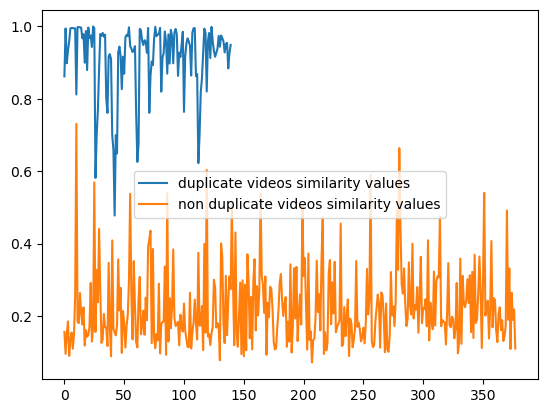

In [14]:
plt.plot(x_pos, pos_sim, label="duplicate videos similarity values")
plt.plot(x_neg, neg_sim, label="non duplicate videos similarity values")
plt.legend()
plt.show()

In [15]:
import pickle


pickle_out = open("pos_sim_Resnet_Trainable_custom_cross_attn_correct_00.pickle","wb")
pickle.dump(pos_sim, pickle_out)
pickle_out.close()

pickle_out = open("neg_sim_Resnet_Trainable_custom_cross_attn_correct_00.pickle","wb")
pickle.dump(neg_sim, pickle_out)
pickle_out.close()

In [16]:
pos_sim_non_zero = [sim if sim>0 else 0 for sim in pos_sim]
neg_sim_non_zero = [sim if sim>0 else 0 for sim in neg_sim]

In [17]:
predictions = pos_sim_non_zero + neg_sim_non_zero
ground_truth = list(ones) + list(zeros)

In [18]:
len(predictions), len(ground_truth)

(518, 518)

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [20]:
def get_metrics(ground_truth, predictions):
    precision = precision_score(ground_truth, predictions)
    recall = recall_score(ground_truth, predictions)
    f1 = f1_score(ground_truth, predictions)
    
    return precision, recall, f1

In [21]:
precision_arr = []
recall_arr = []
f1_arr = []
thresholds = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for threshold in thresholds:
    current_predictions = [1 if pred>threshold else 0 for pred in predictions]
    p, r, f1 = get_metrics(ground_truth, current_predictions)
    precision_arr.append(p)
    recall_arr.append(r)
    f1_arr.append(f1)

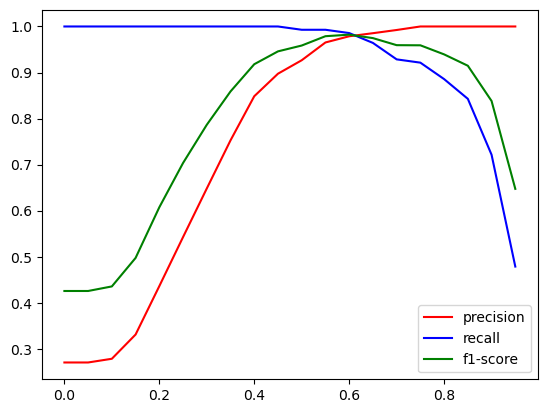

In [22]:
plt.plot(thresholds, precision_arr, 'r', label="precision")
plt.plot(thresholds, recall_arr, 'b', label="recall")
plt.plot(thresholds, f1_arr, 'g', label="f1-score")
plt.legend()
plt.show()

In [23]:
precision_arr

[0.2702702702702703,
 0.2702702702702703,
 0.2783300198807157,
 0.3309692671394799,
 0.43613707165109034,
 0.5426356589147286,
 0.6481481481481481,
 0.7526881720430108,
 0.8484848484848485,
 0.8974358974358975,
 0.9266666666666666,
 0.9652777777777778,
 0.9787234042553191,
 0.9854014598540146,
 0.9923664122137404,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [24]:
recall_arr

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9928571428571429,
 0.9928571428571429,
 0.9857142857142858,
 0.9642857142857143,
 0.9285714285714286,
 0.9214285714285714,
 0.8857142857142857,
 0.8428571428571429,
 0.7214285714285714,
 0.4785714285714286]

In [25]:
f1_arr

[0.4255319148936171,
 0.4255319148936171,
 0.4354587869362364,
 0.497335701598579,
 0.6073752711496746,
 0.7035175879396984,
 0.7865168539325843,
 0.8588957055214724,
 0.9180327868852458,
 0.945945945945946,
 0.9586206896551723,
 0.9788732394366197,
 0.9822064056939502,
 0.9747292418772563,
 0.9594095940959411,
 0.9591078066914498,
 0.9393939393939393,
 0.9147286821705426,
 0.8381742738589211,
 0.6473429951690821]

In [27]:
thresholds[12], precision_arr[12], recall_arr[12], f1_arr[12]

(0.6, 0.9787234042553191, 0.9857142857142858, 0.9822064056939502)

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pos_sim_file = open('pos_sim_Resnet_Trainable_custom_cross_attn_correct_00.pickle', 'rb')   
pos_sim = pickle.load(pos_sim_file)

In [3]:
neg_sim_file = open('neg_sim_Resnet_Trainable_custom_cross_attn_correct_00.pickle', 'rb')   
neg_sim = pickle.load(neg_sim_file)

In [4]:
pos_sim_non_zero = [sim if sim>0 else 0 for sim in pos_sim]
neg_sim_non_zero = [sim if sim>0 else 0 for sim in neg_sim]

In [5]:
ones = np.ones_like(pos_sim)
zeros = np.zeros_like(neg_sim)

In [6]:
predictions = pos_sim_non_zero + neg_sim_non_zero
ground_truth = list(ones) + list(zeros)

In [7]:
def get_metrics(ground_truth, predictions):
    precision = precision_score(ground_truth, predictions)
    recall = recall_score(ground_truth, predictions)
    f1 = f1_score(ground_truth, predictions)
    
    return precision, recall, f1

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [10]:
precision_arr = []
recall_arr = []
f1_arr = []
thresholds = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for threshold in thresholds:
    current_predictions = [1 if pred>threshold else 0 for pred in predictions]
    p, r, f1 = get_metrics(ground_truth, current_predictions)
    precision_arr.append(p)
    recall_arr.append(r)
    f1_arr.append(f1)

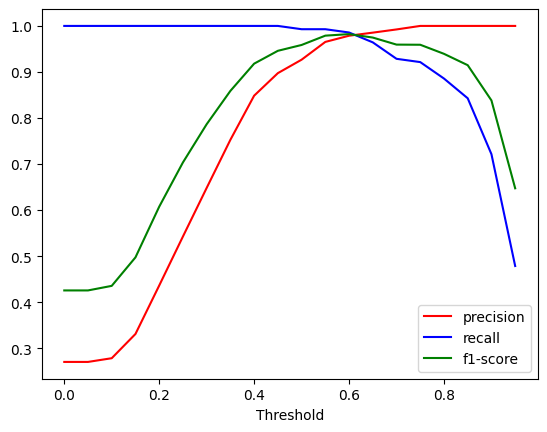

In [11]:
plt.plot(thresholds, precision_arr, 'r', label="precision")
plt.plot(thresholds, recall_arr, 'b', label="recall")
plt.plot(thresholds, f1_arr, 'g', label="f1-score")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [12]:
x_pos = [i for i in range(len(pos_sim))]
x_neg = [i for i in range(len(neg_sim))]

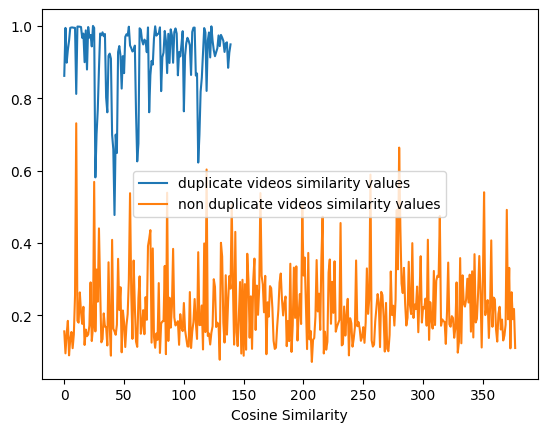

In [13]:
plt.plot(x_pos, pos_sim, label="duplicate videos similarity values")
plt.plot(x_neg, neg_sim, label="non duplicate videos similarity values")
plt.xlabel("Cosine Similarity")
plt.legend()
plt.show()

In [14]:
f1_arr

[0.4255319148936171,
 0.4255319148936171,
 0.4354587869362364,
 0.497335701598579,
 0.6073752711496746,
 0.7035175879396984,
 0.7865168539325843,
 0.8588957055214724,
 0.9180327868852458,
 0.945945945945946,
 0.9586206896551723,
 0.9788732394366197,
 0.9822064056939502,
 0.9747292418772563,
 0.9594095940959411,
 0.9591078066914498,
 0.9393939393939393,
 0.9147286821705426,
 0.8381742738589211,
 0.6473429951690821]

In [28]:
n = 13

In [29]:
thresholds[n], precision_arr[n], recall_arr[n], f1_arr[n]

(0.65, 0.9854014598540146, 0.9642857142857143, 0.9747292418772563)